# Proyecto: Multiclasificación de Deportes

### Problema a Resolver: ¿Podemos clasificar correctamente imágenes de deportes pero con poco material para trabajar?

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import random
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
Path = "../Práctica 3/" #Depende de la ruta en tu máquina

In [6]:
os.makedirs(Path+"deportes", exist_ok=True)

In [7]:
with zipfile.ZipFile(Path + '/archive.zip', 'r') as archive:
   # Extrae todo el contenido del achivo ZIP en el directorio actual
   archive.extractall(Path+"deportes")

In [8]:
os.listdir(Path+"deportes")

['class_dict.csv',
 'EfficientNetB3-sports-0.97.h5',
 'images to predict',
 'sports.csv',
 'test',
 'train',
 'valid']

In [9]:
#Normalizan los valores entre 0 y 1
train = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [10]:
train_dir = Path+"deportes/train"
valid_dir = Path+"deportes/valid"
test_dir = Path+"deportes/test"

train_dataset = train.flow_from_directory(train_dir, 
                                  target_size = (224, 224), 
                                  color_mode = 'rgb',
                                  batch_size = 50,
                                  class_mode = 'categorical')

valid_dataset = train.flow_from_directory(valid_dir, 
                                  target_size = (224, 224), 
                                  color_mode = 'rgb',
                                  batch_size = 50,
                                  class_mode = 'categorical')

test_dataset = test.flow_from_directory(test_dir, 
                                target_size = (224, 224), 
                                color_mode = 'rgb', 
                                batch_size = 50,
                                class_mode= 'categorical')

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [15]:
test_dataset.class_indices

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '

In [20]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    
    keras.layers.Dense(100, activation = 'softmax')
])


In [21]:
# setting hyperparameters
model1.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [22]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 256)      

In [23]:
history = model1.fit(
            train_dataset,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
272/272 - 79s - loss: 4.2984 - accuracy: 0.0496 - val_loss: 3.7834 - val_accuracy: 0.0980
Epoch 2/10
272/272 - 64s - loss: 3.2382 - accuracy: 0.2139 - val_loss: 2.7685 - val_accuracy: 0.3100
Epoch 3/10
272/272 - 64s - loss: 2.3570 - accuracy: 0.3924 - val_loss: 2.3830 - val_accuracy: 0.3860
Epoch 4/10
272/272 - 64s - loss: 1.6963 - accuracy: 0.5485 - val_loss: 2.2243 - val_accuracy: 0.4200
Epoch 5/10
272/272 - 64s - loss: 1.0834 - accuracy: 0.6975 - val_loss: 2.5325 - val_accuracy: 0.4300
Epoch 6/10
272/272 - 64s - loss: 0.5662 - accuracy: 0.8350 - val_loss: 2.9045 - val_accuracy: 0.4580
Epoch 7/10
272/272 - 64s - loss: 0.2750 - accuracy: 0.9164 - val_loss: 3.5175 - val_accuracy: 0.4220
Epoch 8/10
272/272 - 64s - loss: 0.2041 - accuracy: 0.9386 - val_loss: 3.8584 - val_accuracy: 0.4260
Epoch 9/10
272/272 - 64s - loss: 0.1285 - accuracy: 0.9638 - val_loss: 4.4160 - val_accuracy: 0.4620
Epoch 10/10
272/272 - 64s - loss: 0.1292 - accuracy: 0.9618 - val_loss: 4.5106 - val_accura

In [24]:

print("PERFOMANCE",model1.evaluate(test_dataset))


10/10 [==============================] - 3s 261ms/step - loss: 3.6296 - accuracy: 0.4640
PERFOMANCE [3.6295993328094482, 0.46399998664855957]


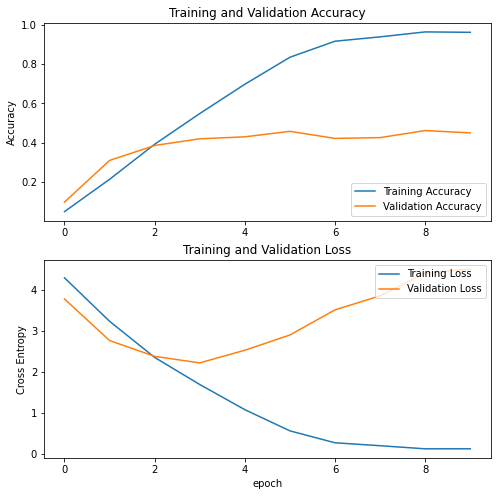

In [25]:
# get the metrics from history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [11]:
train_dataset_augmented = ImageDataGenerator(rescale = 1./255.,
                                             rotation_range = 40, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2, 
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             horizontal_flip = True, 
                                             vertical_flip =True
                                            )

In [12]:
train_dataset_augmented = train.flow_from_directory(train_dir, 
                                                    target_size = (224, 224), 
                                                    color_mode = 'rgb',
                                                    batch_size = 50,
                                                    class_mode = 'categorical'
                                                   )

Found 13572 images belonging to 100 classes.


In [28]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    
    keras.layers.Dense(100, activation = 'softmax')
])

In [29]:
# setting hyperparameters
model2.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [30]:
history2 = model2.fit(
            train_dataset_augmented,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
272/272 - 65s - loss: 4.1741 - accuracy: 0.0570 - val_loss: 3.6212 - val_accuracy: 0.1260
Epoch 2/10
272/272 - 64s - loss: 3.2294 - accuracy: 0.2125 - val_loss: 2.7883 - val_accuracy: 0.3160
Epoch 3/10
272/272 - 64s - loss: 2.3703 - accuracy: 0.3899 - val_loss: 2.1097 - val_accuracy: 0.4340
Epoch 4/10
272/272 - 64s - loss: 1.7394 - accuracy: 0.5321 - val_loss: 1.8812 - val_accuracy: 0.5120
Epoch 5/10
272/272 - 64s - loss: 1.2041 - accuracy: 0.6631 - val_loss: 1.9006 - val_accuracy: 0.4880
Epoch 6/10
272/272 - 64s - loss: 0.7300 - accuracy: 0.7845 - val_loss: 2.0999 - val_accuracy: 0.5200
Epoch 7/10
272/272 - 64s - loss: 0.3831 - accuracy: 0.8809 - val_loss: 2.7573 - val_accuracy: 0.5080
Epoch 8/10
272/272 - 64s - loss: 0.2383 - accuracy: 0.9282 - val_loss: 2.8817 - val_accuracy: 0.5120
Epoch 9/10
272/272 - 64s - loss: 0.1648 - accuracy: 0.9480 - val_loss: 3.1555 - val_accuracy: 0.4820
Epoch 10/10
272/272 - 65s - loss: 0.1398 - accuracy: 0.9579 - val_loss: 3.4027 - val_accura

In [31]:

print("PERFOMANCE",model2.evaluate(test_dataset))


10/10 [==============================] - 1s 89ms/step - loss: 3.4462 - accuracy: 0.5220
PERFOMANCE [3.44620680809021, 0.5220000147819519]


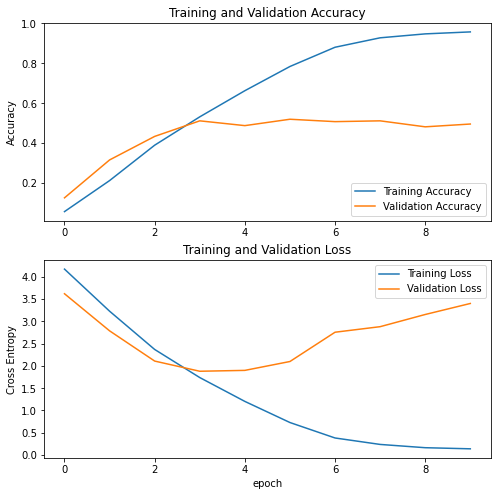

In [32]:
# get the metrics from history

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
import efficientnet.tfkeras as efn

In [14]:
base_model =  efn.EfficientNetB0(input_shape = (224, 224, 3), # Shape of our images
                                 include_top = False, # Leave out the last fully connected layer
                                 weights = 'imagenet')

In [15]:
for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()  

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [16]:
model3 = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation = 'softmax')
])

In [17]:
# setting hyperparameters
model3.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [18]:
history3 = model3.fit(
            train_dataset_augmented,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
272/272 - 122s - loss: 1.6584 - accuracy: 0.5863 - val_loss: 0.4627 - val_accuracy: 0.8520
Epoch 2/10
272/272 - 64s - loss: 0.6005 - accuracy: 0.8256 - val_loss: 0.3110 - val_accuracy: 0.9080
Epoch 3/10
272/272 - 64s - loss: 0.4007 - accuracy: 0.8828 - val_loss: 0.2258 - val_accuracy: 0.9320
Epoch 4/10
272/272 - 66s - loss: 0.3001 - accuracy: 0.9080 - val_loss: 0.2168 - val_accuracy: 0.9420
Epoch 5/10
272/272 - 66s - loss: 0.2312 - accuracy: 0.9269 - val_loss: 0.1812 - val_accuracy: 0.9440
Epoch 6/10
272/272 - 66s - loss: 0.1844 - accuracy: 0.9431 - val_loss: 0.2029 - val_accuracy: 0.9340
Epoch 7/10
272/272 - 65s - loss: 0.1621 - accuracy: 0.9501 - val_loss: 0.1710 - val_accuracy: 0.9460
Epoch 8/10
272/272 - 66s - loss: 0.1388 - accuracy: 0.9573 - val_loss: 0.2481 - val_accuracy: 0.9240
Epoch 9/10
272/272 - 65s - loss: 0.1283 - accuracy: 0.9583 - val_loss: 0.2717 - val_accuracy: 0.9240
Epoch 10/10
272/272 - 64s - loss: 0.1323 - accuracy: 0.9581 - val_loss: 0.1714 - val_accur

In [39]:

print("PERFOMANCE",model3.evaluate(test_dataset))


10/10 [==============================] - 2s 216ms/step - loss: 0.2359 - accuracy: 0.9400
PERFOMANCE [0.23593440651893616, 0.9399999976158142]


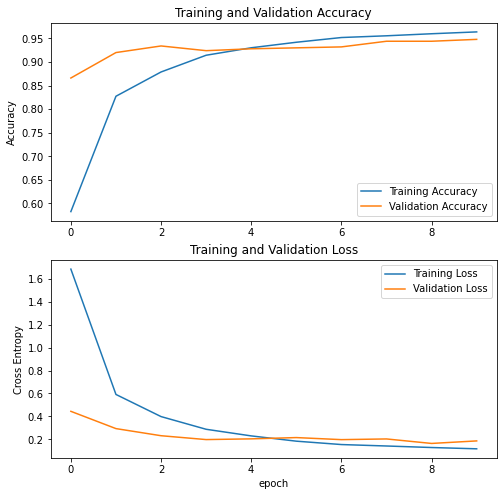

In [40]:
# get the metrics from history

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [1]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model3.predict(X)
    a = test_dataset.class_indices.keys()
    b = test_dataset.class_indices.values()
    print(a)
    print(list(a))
    print(b)
    label = list(a)[list(b).index(np.where(val==1)[0])]
    
    print(val)
    plt.xlabel(label, fontsize=30)

1/1 [==============================] - 2s 2s/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 8.5784965e-13 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+0

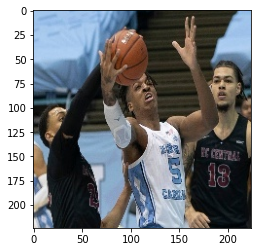

In [25]:
predictImage(Path + "deportes/images to predict/1.jpg")